In [7]:
# импортируем библиотеки 

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandahouse
from read_db.CH import Getch



In [8]:
# формируем датафрейм 

data = Getch(''' SELECT exp_group, 
                        user_id,
                        sum(action = 'like') likes,
                        sum(action = 'view') views,
                        likes/views ctr
                FROM simulator_20220320.feed_actions 
                WHERE toDate(time) between '2022-03-08' and '2022-03-14'
                        and exp_group in (2,3)
                GROUP BY exp_group, user_id
''').df

In [9]:
data.groupby('exp_group').count()



,user_id,likes,views,ctr
exp_group,,,,
2,8480,8480,8480,8480
3,8569,8569,8569,8569


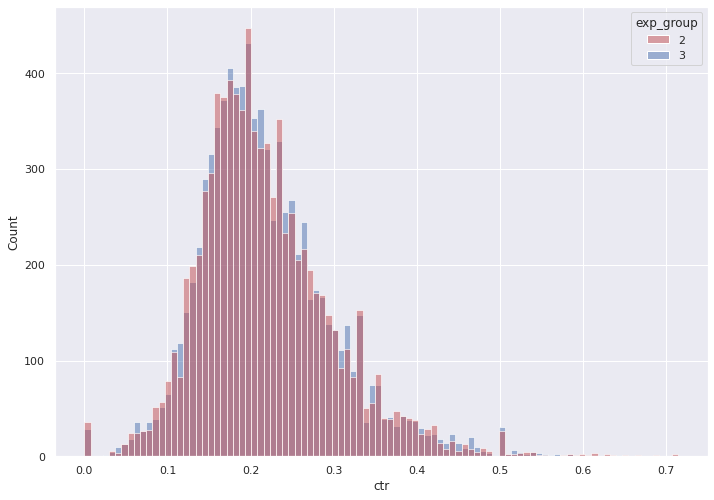

In [10]:
# Сделаем графики в seaborn покрупнее
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = data, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [29]:
# проведем 10 000 АА тестов и запишем значения p-value  в одноименную переменную 

p_values = []

for i in range(10000):
    group_1 = data[data.exp_group == 2].sample(500, replace=True)
    group_2 = data[data.exp_group == 3].sample(500, replace=True)
    p_values.append(stats.ttest_ind(group_1.ctr, group_2.ctr, equal_var=False).pvalue)

<AxesSubplot:ylabel='Count'>

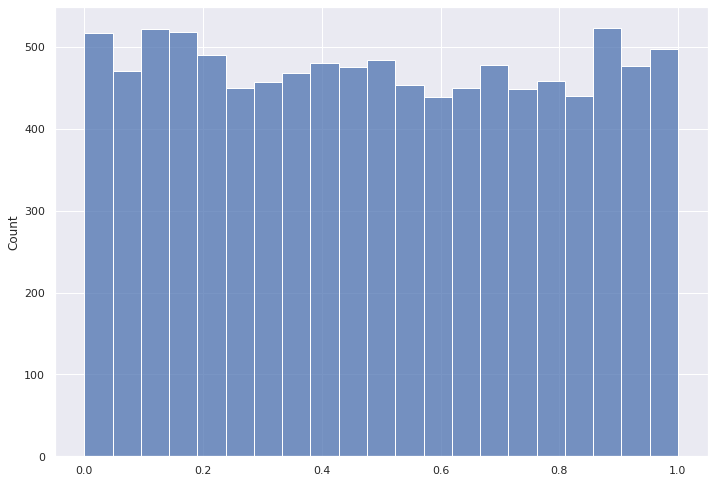

In [30]:
# строим график распределения 

sns.histplot(p_values)

In [31]:
# На графике видим, что p-value распределено достаточно равномерно 
# Посмотрим в скольки процентах случаев p-value оказывается меньше или равен alpпф = 0,05

count_values = 0

for i in p_values: 
    if i <= 0.05: 
        count_values += 1 

print(count_values / 10000 * 100)
        


5.3


In [ ]:
# Исходя из полученных нами данных можно сделать вывод, что система сплитирования 
# работает корректно 